# DISCUSSION 8: the SciPy statistics toolbox

### Goals:
<ol>
    <li> Learn how to use SciPy statistics toolbox  (scipy.stat) </li>
    <li> Plot PDFs/PMFs/CDFs of variaous distributions, with various parameters </li>
    <li> Do freqeuncy statistics of samples from those distributions </li>
</ol>

### Secondary goals:
<ol>
    <li> Learn how to plot multiple graph on the same axis and on different axses </li>
</ol>

### First things first, run the cell below to import all the required modules for the rest of the exercise

In [2]:
import numpy as np                 # NumPy
import scipy.stats as stat         # Statistical toolsbox
import matplotlib.pyplot as plt    # Some fancy plot utilities

# 0) Preliminary note: more about plotting  in Matplotlib

The function plt.plot(x,y,extra parameters) takes two lists of <b> same lengths </b>
of x coordinates and y coordinates. By default, it connects the points with straight lines.
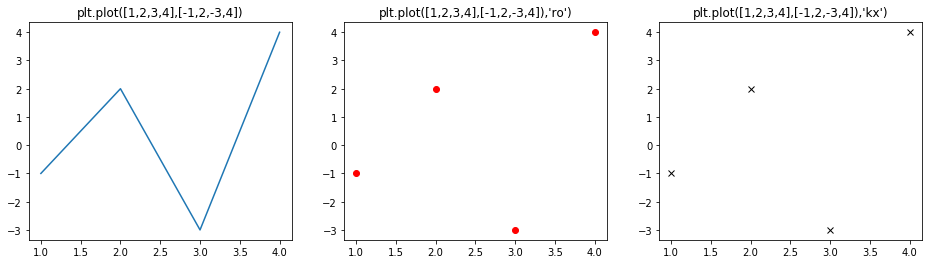


### Plotting functions of real variables
To plot a function f(x) of some real variable x. Suppose that you created
a vector x of many-many coordinates on the x-axis, to create the images
simply apply f to x, i.e.   y=f(x)  (literally, in Python) will apply f 
element-by-element to x, such that y = [f(x[0]), f(x[1]),...]

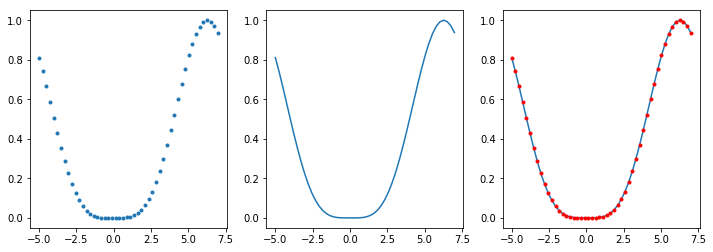

In [3]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

def f(x):
    return np.sin(x/4)**4

x = np.linspace(-5,7,50) # this will create 50 uniformly spaced points between -5 to 7
ax[0].plot(x,f(x),'.')
ax[1].plot(x,f(x));
ax[2].plot(x,f(x),x,f(x),'r.');

***
## 1) Defining distributions using SciPy and plotting their PMF

There are various implementations of distributions in scipy statistics tooldbox,
e.g. geom, expon, norm, uniform etc.  A complete list is provided in  <a href = https://docs.scipy.org/doc/scipy/reference/stats.html> list of 
    implemented distributions</a>

To define a random variable of type [distr] (fill in your chosen distribution), simply write
     X = stat.[distr] 
(see example below).

The newley created object give both probabilistic tools (models) as well as
statistical tools (data sampling).  You will then have at your disposal:
<ul>
    <li> CDF of that variable (the function X.cdf(t)) </li>
    <li> PDF/PMF (X.pmf(t) or X.pdf(t) based on discrete/continuous) </li>
    <li> A random generator for drawing samples from this distribution (the X.rvs() function). </li>
    <li> Percentile function X.ppf(p) </li>
    <li> Many other goodies (mean, variance, moments, kurtosis, and other scary terms) </li>
</ul>

## 1.1)  Example: Geometric Distribution
Recall that $X\sim\text{Geo}(p)$ counts the number of trials until the first success in a series of
Bernoulli trials. The PMF would be 
$$\mathbf{p}(X=k)=(1-p)^{k-1}p$$ 
for $k\geq 1.$ where $p\in [0,1]$ is the success probability of a single Bernoulli trial.  

We start by simply plotting the PMF on some value set.  The discrete variables
in SciPy are almost always integer valued. 

### Exercise: 
<ol>
    <li> Run the code below </li>
    <li> Modify the code below for Poisson distribution (stat.poisson) with $\lambda=3$. Change the 
         distribution parameters, and see how the PMF reacts </li>
    <li> Repeat for Binomial (stat.binom) with $N=20$ and $p=0.4$.  Adjust the plot range as necessary (the array T) </li>
</ol>

p(X=2) =  0.21 , p(X=2.5) =  0.0 , F_X(-3)= 0.0


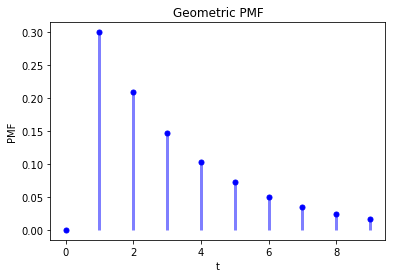

In [4]:
X = stat.geom(p=0.3) 

# Now X is a "random variable" object of this distribution
# We can evaluate its PMF and CDF
print('p(X=2) = ', X.pmf(2), ', p(X=2.5) = ', X.pmf(2.5) , ', F_X(-3)=',X.cdf(-3))

T = np.arange(10)

plt.title('Geometric PMF')  # Dont forget to change the title !
plt.plot(T, X.pmf(T), 'bo', ms=5)
plt.vlines(T, 0, X.pmf(T), colors='b', lw=3, alpha=0.5);
plt.xlabel('t')
plt.ylabel('PMF');

p(X=2) =  0.22404180765538775 , p(X=2.5) =  0.0 , F_X(-3)= 0.0


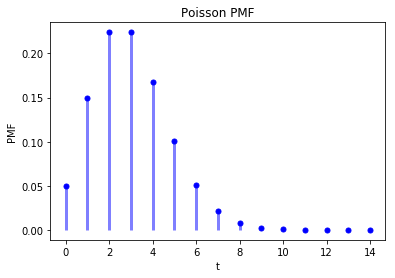

In [22]:
X = stat.poisson(3) 

# Now X is a "random variable" object of this distribution
# We can evaluate its PMF and CDF
print('p(X=2) = ', X.pmf(2), ', p(X=2.5) = ', X.pmf(2.5) , ', F_X(-3)=',X.cdf(-3))

T = np.arange(15)

plt.title('Poisson PMF')  # Dont forget to change the title !
plt.plot(T, X.pmf(T), 'bo', ms=5)
plt.vlines(T, 0, X.pmf(T), colors='b', lw=3, alpha=0.5);
plt.xlabel('t')
plt.ylabel('PMF');

p(X=2) =  0.0030874226827198427 , p(X=2.5) =  0.0 , F_X(-3)= 0.0


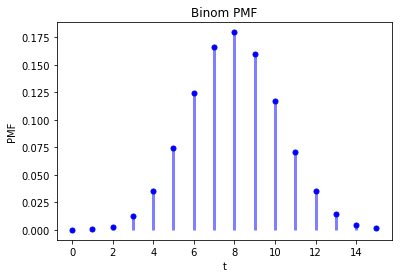

In [26]:
X = stat.binom(20,0.4) 

# Now X is a "random variable" object of this distribution
# We can evaluate its PMF and CDF
print('p(X=2) = ', X.pmf(2), ', p(X=2.5) = ', X.pmf(2.5) , ', F_X(-3)=',X.cdf(-3))

T = np.arange(16)

plt.title('Binom PMF')  # Dont forget to change the title !
plt.plot(T, X.pmf(T), 'bo', ms=5)
plt.vlines(T, 0, X.pmf(T), colors='b', lw=3, alpha=0.5);
plt.xlabel('t')
plt.ylabel('PMF');

***
# 2) CDF Plotting 

The CDF (and PDF) function, unlike to the PMF, is typically plotted on a dense ("continuous") line,
as a function of a real variable (rather than a sequence of values).

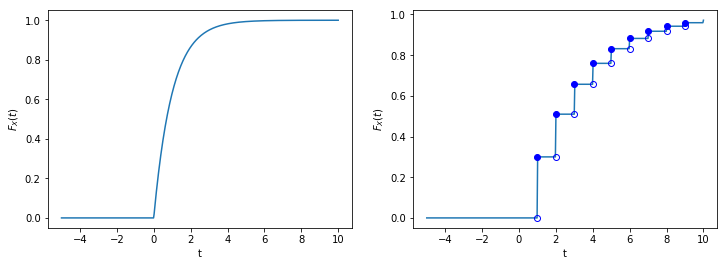

### Exercise
<ol>
    <li> Run the code below </li>
    <li> Modify the code below for binom(N,p). 
        <ul>
            <li> Pick appropriate bounds. </li>
            <li> <b> Add discontinuity markers:</b> use plot(x,y,'o') for full markers, plot(x,y,'o',fillstyle='none') for hollow
            </li>
        </ul>
    </li>
    <li> Change the parameters, and see how the CDF reacts </li>
    <li> Repeat uniform(a,b). No need to plot jump markers (the distribution is continuous </li>
</ol>



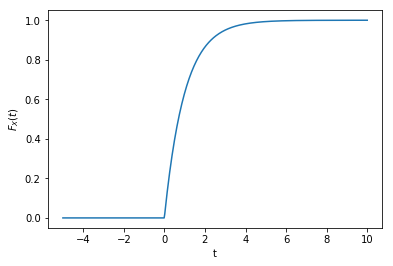

In [27]:
# Plot CDFs as instructed
X = stat.expon(scale=1) 
t = np.linspace(-5,10,500) # the third parameter is the number of points

plt.plot(t,X.cdf(t))
plt.xlabel('t');
plt.ylabel(r'$F_X(t)$');

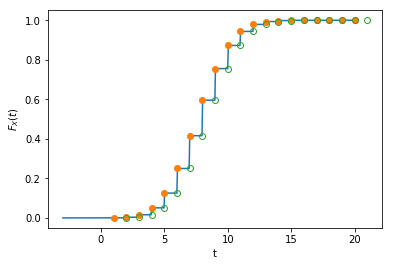

In [39]:
# Plot CDFs as instructed
X = stat.binom(20,.4) 
t = np.linspace(-3,20,500) # the third parameter is the number of points

tRange = np.linspace(1,20,20)
plt.plot(t,X.cdf(t))
plt.plot(tRange,X.cdf(tRange),'o')
plt.plot(tRange+1,X.cdf(tRange),'o',fillstyle='none')
plt.xlabel('t');
plt.ylabel(r'$F_X(t)$');

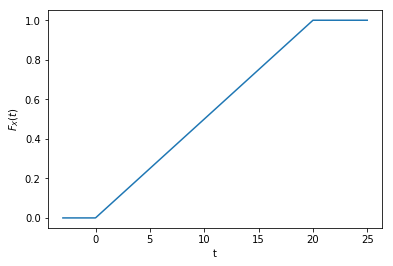

In [43]:
# Plot CDFs as instructed
X = stat.uniform(0,20) 
t = np.linspace(-3,25,500) # the third parameter is the number of points

plt.plot(t,X.cdf(t))
plt.xlabel('t');
plt.ylabel(r'$F_X(t)$');

*** 
# 3) Sampling random data from a distribution

The function X.rvs(n) will sample n random samples from the distribution of X. The result
is an array of numbers.

### Exercise:
The cell below plots samples from exponential and geometric variables. 
<ol>
    <li> Run the code below </li>
    <li> Modify the code below for X~binom(10,0.4) and Y~norm(5,1).  Pick appropriate bounds on the y-axis </li>
    <li> Modify Y to uniform(2,5) </li>
    <li> norm(5,1) </li>
    <li> Change the distribution parameters and number of samples, and see how the scatter plot reacts </li>
</ol>

#### Pro tip 1:  adding legend to multiple data set plots
In general, several plot calls will overlay each other (unlike Matlab, there is no need to "hold on").
If you plot more than one function on the same axis, you can add "label=whatever"  to your plot call,
and then run plt.legend() (or axis.legen()) to add the legend box.

#### Pro tip 2:  colored and translucent plots
When plotting several graphs, it's sometime helpful to separate them by colors.  In addition,
traslucency might be helpful too. Add alpha=some value to your plot calls, it will make
the color translucent (and not cover what's underneath). 

[2 3 2 7 1]


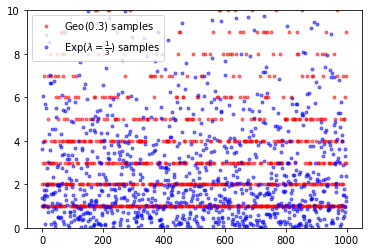

In [7]:
# scatter some samples
# Sample some random data from this distribution:

X = stat.geom(p=0.3)  
Y = stat.expon(scale=3) # scale = 1/lambda

print(X.rvs(5)) # print some samples from a the distribution

num_sampes = 1000

plt.plot(X.rvs(num_sampes),'r.',alpha=0.5,label=r'Geo$(0.3)$ samples')
plt.plot(Y.rvs(num_sampes),'b.',alpha=0.5,label=r'Exp$(\lambda = \frac{1}{3})$ samples')
plt.ylim(0,10)
plt.legend();

[3 4 3 5 4]


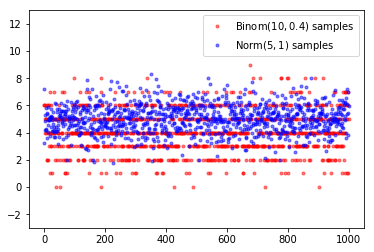

In [51]:
X = stat.binom(10,0.4)  
Y = stat.norm(5,1)

print(X.rvs(5)) # print some samples from a the distribution

num_sampes = 1000

plt.plot(X.rvs(num_sampes),'r.',alpha=0.5,label=r'Binom$(10,0.4)$ samples')
plt.plot(Y.rvs(num_sampes),'b.',alpha=0.5,label=r'Norm$(5,1)$ samples')
plt.ylim(-3,13)
plt.legend();

[5.17226281 3.2871306  4.93410965 6.88166714 6.01895993]


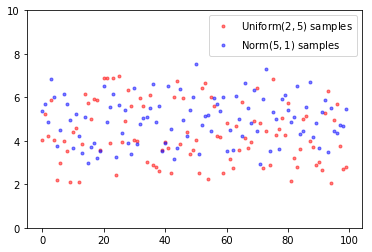

In [52]:
X = stat.uniform(2,5)
Y = stat.norm(5,1)

print(X.rvs(5)) # print some samples from a the distribution

num_sampes = 100

plt.plot(X.rvs(num_sampes),'r.',alpha=0.5,label=r'Uniform$(2,5)$ samples')
plt.plot(Y.rvs(num_sampes),'b.',alpha=0.5,label=r'Norm$(5,1)$ samples')
plt.ylim(0,10)
plt.legend();

*** 
# 4) Frequency tables

Assume that we have $N$ samples of a given distribution. 
<b> Frequency </b> of a value is how many times it appears in the sample. Frequency tables list the frequencies of all values. A <b> normalized </b> frequency table divides each value by the overall number of samples (i.e. relative frequency). 

### Exercise:
<ol>
    <li> Run the code below </li>
    <li> repeat with binom(10,0.6). Change the distribution parameters and number 
                of samples, and see how frequency table reacts  </li>
    <li> repeat with uniform(3,6)  </li>
    <li> repeat with norm(5,1)  </li>
    <li> Explain the difference between the results of continuous vs discrete distributions ? </li>
</ol>


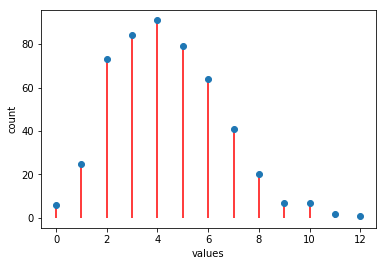

In [8]:
X = stat.poisson(4.5)  
data= X.rvs(500)

vals = sorted(list(set(data)))
freq_table = [np.count_nonzero(data==t) for t in vals] # The NumPy way
plt.plot(vals,freq_table,'o')
plt.vlines(vals,0,freq_table,'r')
plt.xlabel('values')
plt.ylabel('count');

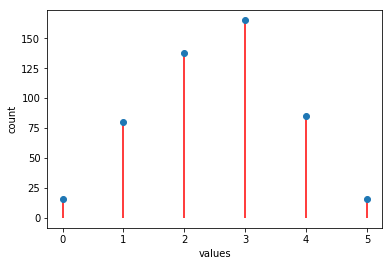

In [55]:
X = stat.binom(5,0.5)
data= X.rvs(500)

vals = sorted(list(set(data)))
freq_table = [np.count_nonzero(data==t) for t in vals] # The NumPy way
plt.plot(vals,freq_table,'o')
plt.vlines(vals,0,freq_table,'r')
plt.xlabel('values')
plt.ylabel('count');

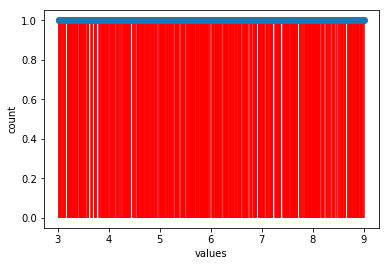

In [58]:
X = stat.uniform(3,6)
data= X.rvs(500)

vals = sorted(list(set(data)))
freq_table = [np.count_nonzero(data==t) for t in vals] # The NumPy way
plt.plot(vals,freq_table,'o')
plt.vlines(vals,0,freq_table,'r')
plt.xlabel('values')
plt.ylabel('count');

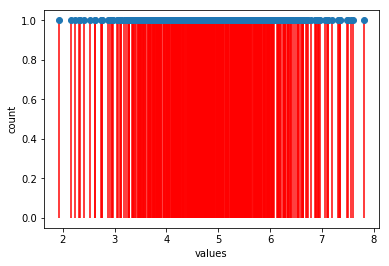

In [57]:
X = stat.norm(5,1)
data= X.rvs(500)

vals = sorted(list(set(data)))
freq_table = [np.count_nonzero(data==t) for t in vals] # The NumPy way
plt.plot(vals,freq_table,'o')
plt.vlines(vals,0,freq_table,'r')
plt.xlabel('values')
plt.ylabel('count');

# 4) (contd.)  Frequency tables and PMFs

Normalized frequency table of a discrete population (finite sample from a distribution) sample is 
an approximation of its PMF. The more samples we take, the closer they get. 

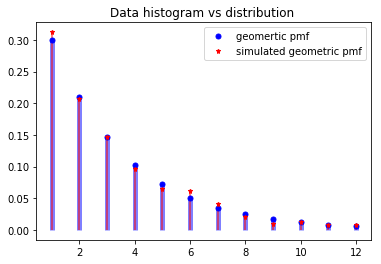


### Exercise: 

<ol>
    <li> Complete the code below to plot the (normalized) freqeuncy table and the PMF of the same graph (see example above) </li>
    <li> Repeat with binom(10,0.6). Change the number of samples, and determine the difference  </li>
    <li> Repeat with uniform(3,6)  </li>
</ol>


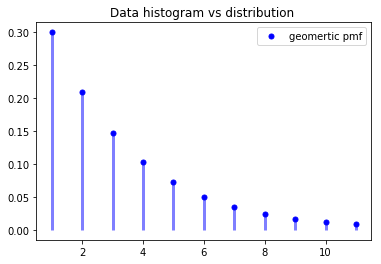

In [59]:
# Compare PMF to frequency table
X = stat.geom(p=0.3)
data= X.rvs(1000)
t = np.arange(1,12)
normalized_freq_table = [np.count_nonzero(data==t) for t in vals] # Complete

plt.title('Data histogram vs distribution ')
plt.vlines(t, 0, X.pmf(t), colors='b', lw=3, alpha=0.5)
plt.plot(t, X.pmf(t), 'bo', ms=5, label = 'geomertic pmf')

# Plot the frequency table too (complete the code)

plt.legend();

# 5) Histograms

A <a href = https://en.wikipedia.org/wiki/Histogram#Examples>  histogram </a> is a frequency table, that <b> counts occurences on intervals </b> (called "bins") rather than on exact values.  Because of that, histogram plots are usually <b> bar-plots </b> (as in the figure below) rather than stem (lollipop) plots.

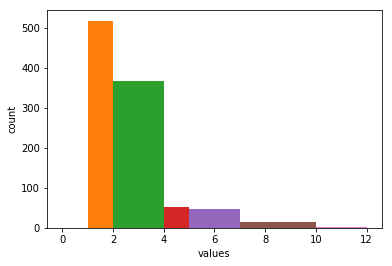

### Why hisograms ?
Histograms make an effective tool for data reduction: e.g. if we don't care how often $X=4.17$ but rather how often $4\leq X<5$. This makes them particularly useful (and de-facto the only practical way) to measure frequency of continuous distribuions, where the PMF vanishes. The bars capture all values within a given interval.


### Normalized  histograms
A <b> normalized histogram </b> is one that each bin contains the <b> relative portion </b> rather than the number of elements, and can be obtained by dividing the regular histogram by the number of elements. 

Normalized histograms are related to PMFs in the sense that both measure (relative) frequency of values. Histograms counts on intervals, while PMF counts on a single value.


The code below demonstrates the construction of a histogram.

### Exercise: 

<ol>
    <li> Run the code below </li>
    <li> Change the bin edges to integers {0,1,2,...,10}. Use the np.arange function. </li>
    <li> Repeat with binom(10,0.4). </li>
    <li> Repeat with norm(5,1). </li>
</ol>


In [ ]:
X = stat.geom(p=0.5)  
data= X.rvs(1000)

bin_edges = [0,1,2,4,5,7,10,12] # those are nonuniform

bins = [(b1,b2) for b1,b2 in zip(bin_edges[0:-1],bin_edges[1:])]
histogram = [sum((b1<=data) & (data<b2)) for b1,b2 in bins]
widths = [b2-b1 for b1,b2 in bins]

plt.bar(bin_edges[:-1],histogram,align='edge',width = widths)

plt.xlabel('values')
plt.ylabel('count');

## Pro Tip: the matplotlib histogram function 

Rather than writing histograms on our own, we can use the function <a href= https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html> plt.hist </a> instead.  

The parameter bins determines the cutoffs of the ranges. For example bins = [0,1,2,3]  will generate the bins $[0,1)$, $[1,2)$, $[2,3]$ (the last bin always contains both endpoints.  

The function also returns a tuple of bins and frequencies, for later use.

In [ ]:
# Matplotlib histogram
plt.hist(data, bins = np.arange(10))
plt.xlabel('values')
plt.ylabel('count')
plt.show()

# 5) (contd.) Histograms and PMFs/PDFs

Like the frequency tables, normalized histograms approximate PMFs and PDFs well.
The more samples we take, the closer the normalized freqeuncy table gets to the PDF/PMF.

### Exercise 

<ol>
    <li> Plot the (normalized) histogram and PMF of binom(10,0.4) on the same graph
       (see example in figure below). Use plt.stem() to plot the pmf </li>
     <li> Repeat with poisson(4.5). </li>
     <li> Repeat with binom(10,0.4). Use the plt.plot() to plot the pdf </li>
</ol>

#### Tip: plot the histogram first, then PMF/PDF on top of it

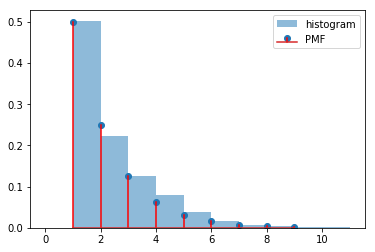

In [ ]:
X = stat.geom(p=0.5)  
data= X.rvs(1000)
t=np.arange(1,10)

# Continue here ... 

# 6) Cumulative histograms

Those are histograms in which the bins are cumulaitves. This is an approximation of the CDF (see figure below).
To create a cumulative histogram, just add cumulative=True to the hist() call.

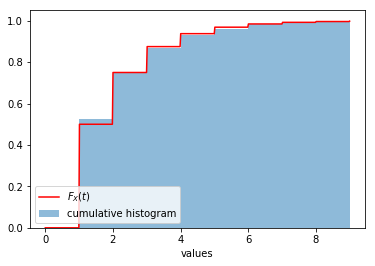


<ol>
    <li> Plot the (normalized) cumulative histogram and CDF of binom(10,0.4) on the same graph </li>
     <li> Repeat with poisson(4.5). </li>
     <li> Repeat with binom(10,0.4). Use the plt.plot() to plot the pdf </li>
</ol>


In [ ]:
X = stat.geom(p=0.5)  
data= X.rvs(1000)
t=np.arange(1,10)

# complete... 

# Final exericse

Consider the plots;

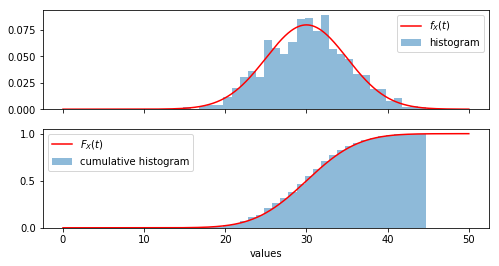
***
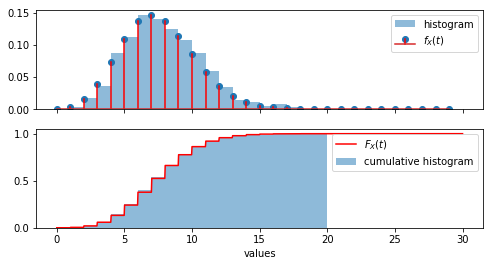

Recreate the plots above for stat.norm(5,30), stat.expon(scale=0.4), state.geom(0.6), stat.poisson(3.5).
Use PMF or PDF where appropriate, and 500<N<5000 samples (choose your lucky number).  The code
below will get you started

#### Pro Tip: multiple axes on the same plot
Sometimes we want to plot one graph on top of the other.  To create a grid of 
graphs, use plt.subplots(rows,columns) function. This will return a "handle" to
the figure, and an array for the different axes (see in the incomplete code below).


In [ ]:
X = stat.poisson(7.5)

data = X.rvs(1000)

fig,ax = plt.subplots(2,1,sharex=True,figsize=(8,4))

ax[0].plot([1,2,3,4],[1,2,3,4],'rx',label='Some plotz')
ax[1].set_xlabel('values')
ax[0].legend();